<a href="https://colab.research.google.com/github/nihar-max/ted_talk_views_prediction/blob/master/TED_Talk_Views_Prediction_Part_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

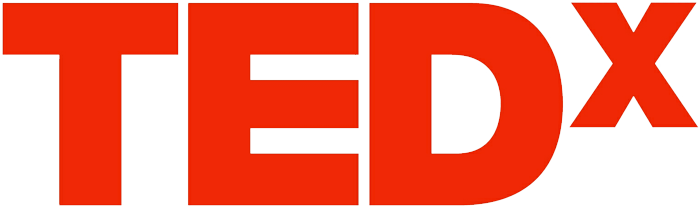

# TED Talk views Prediction


#### TED is devoted to spread powerful ideas on any topic.Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life.


Number of TED talks: 4,005<br>
Number of speakers: 3,274<br>
Number of events: 459<br>
Timespan: Jun 2006 - Apr 2020<br>
Attributes: 19<br>

Attribute Information:

1. talk_id
2. title - Title of talk
3. speaker_1 - First speaker in TED's speaker list
4. all_speakers -Speakers in the talk
5. occupations - Occupations of the speakers
6. about_speakers - number of users who indicated whether they found the review helpful or not
7. recorded_date - Date when Talk was recorded
8. published_date - Date when talk was published
9. event - Event or medium in which the talk was given
10. native_lang - Orignal language of talk
11. available_lang -Dubbed lang of talk
12. comments - Comments given by the users who watched the TED talk
13. duration - Duration in seconds
14. topics - Topic of the ted talk
15. related_talks -
16. url - URL
17. description - Description

Target Var:

1. Views: Total views on the TED talk

### **Objective**:
To build predictive model, which help in predicting views of video uploaded on TEDX website.




<h2>1. Mapping the real-world problem to an ML problem</h2>

<h3>1.2 Type of Machine Learning Problem</h3>

<p>
    
            Task is to predict views of TED talk videos => Regression problem
   
      
    
</p>

<h2>2. Reading Data</h2>
<h3> 2.1 Loading the data </h3>

The dataset is available in:
1. .csv file format

In order to load the data, We are using csv dataset with help of pandas library.
<br>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import  seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/BI/ML Project/TED talk views prediction/data_ted_talks.csv")

In [ ]:
#Using Pandas library to load dataset
df = pd.read_csv('/content/drive/MyDrive/TED_Talk_views_prediction/data_ted_talks.csv',
                  engine="python",
                  error_bad_lines=False,
                  encoding='utf-8')

<ipython-input-125-a6a45a8e26bf>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/TED_Talk_views_prediction/data_ted_talks.csv',


In [ ]:
print("Number of data points in our data:", df.shape)
df.head(1)

Number of data points in our data: (4005, 19)


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."


In [ ]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

<h2>3. Exploratory Data Analysis</h2>

In [ ]:
# explore published_date column & extract weekday, month and year & add three separate columns as:
# - release_day
# - release_month
# - release_year
df['published_year'] = df['published_date'].str.split('-').str[0]
df['published_month'] = df['published_date'].str.split('-').str[1]
df['published_day'] = df['published_date'].str.split('-').str[2]

In [ ]:
df['published_year']=df['published_year'].astype(int)
df['published_month']=df['published_month'].astype(int)
df['published_day']=df['published_day'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   talk_id          4005 non-null   int64  
 1   title            4005 non-null   object 
 2   speaker_1        4005 non-null   object 
 3   all_speakers     4001 non-null   object 
 4   occupations      3483 non-null   object 
 5   about_speakers   3502 non-null   object 
 6   views            4005 non-null   int64  
 7   recorded_date    4004 non-null   object 
 8   published_date   4005 non-null   object 
 9   event            4005 non-null   object 
 10  native_lang      4005 non-null   object 
 11  available_lang   4005 non-null   object 
 12  comments         3350 non-null   float64
 13  duration         4005 non-null   int64  
 14  topics           4005 non-null   object 
 15  related_talks    4005 non-null   object 
 16  url              4005 non-null   object 
 17  description   

In [ ]:
df[['published_date','published_month','published_day','published_year']].head(3)

,published_date,published_month,published_day,published_year
0,2006-06-27,6,27,2006
1,2006-06-27,6,27,2006
2,2006-06-27,6,27,2006


In [ ]:
print('Total data points in our data:',df.shape)
df.head(1)

Total data points in our data: (4005, 22)


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,comments,duration,topics,related_talks,url,description,transcript,published_year,published_month,published_day
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,6,27


<h3> 3.1 Check for Missing values </h3>

In [ ]:
#Let us capture all the nan values
features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
print("*"*50)
for feature in features_nan:
  print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)*100))
print("*"*50)
print("Data type of those missing nan value features:")
print(df[features_nan].dtypes)

**************************************************
all_speakers: 0.1% missing values
occupations: 13.03% missing values
about_speakers: 12.559999999999999% missing values
recorded_date: 0.02% missing values
comments: 16.35% missing values
**************************************************
Data type of those missing nan value features:
all_speakers       object
occupations        object
about_speakers     object
recorded_date      object
comments          float64
dtype: object


#### .Since there are few missing values, we need to find the relationship between missing values and Views

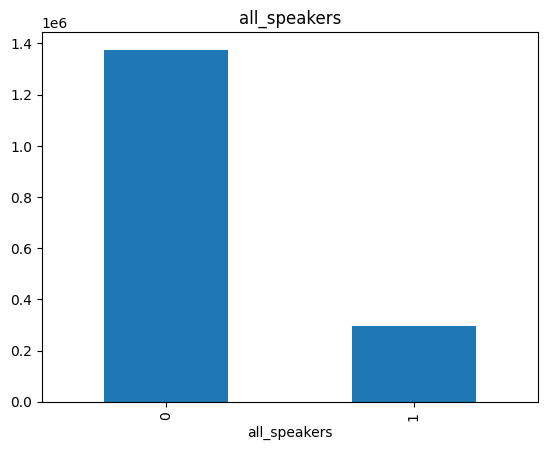

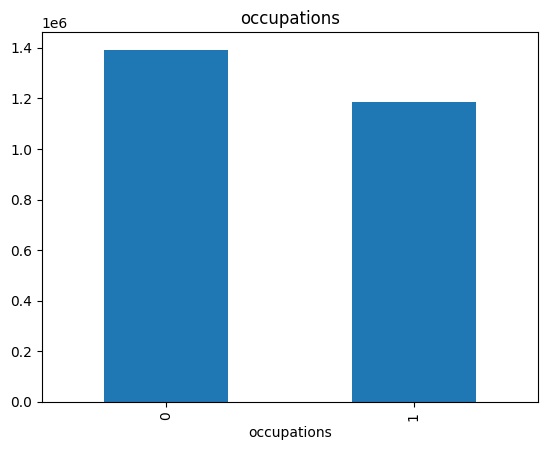

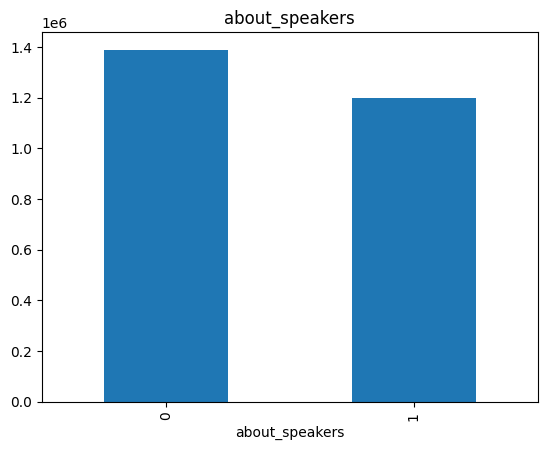

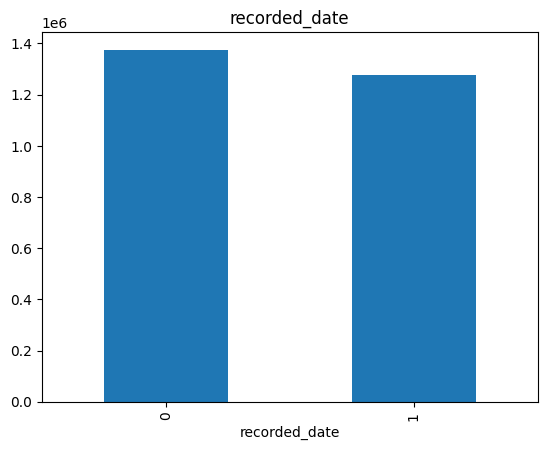

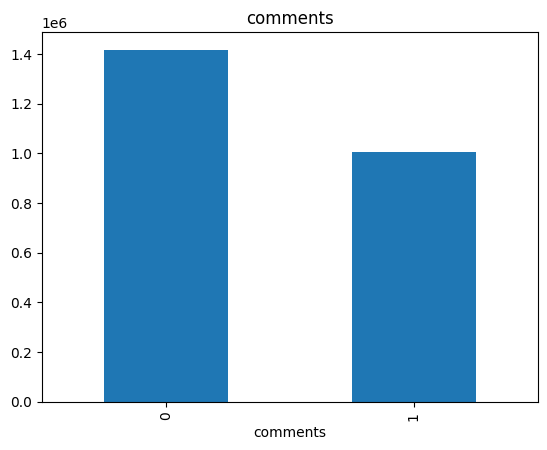

In [ ]:
for feature in features_nan:
  data = df.copy()

  data[feature] = np.where(data[feature].isnull(),1,0)

  data.groupby(feature)['views'].median().plot.bar()
  plt.title(feature)
  plt.show()

In [ ]:
for feature in features_nan:
  data1 = df.copy()

  data1[feature] = np.where(data1[feature].isnull(),1,0)

  print(data1.groupby(feature)['views'].median())

all_speakers
0    1375679.0
1     294402.0
Name: views, dtype: float64
occupations
0    1391746.0
1    1185482.5
Name: views, dtype: float64
about_speakers
0    1388598.0
1    1196869.0
Name: views, dtype: float64
recorded_date
0    1375593.5
1    1276272.0
Name: views, dtype: float64
comments
0    1416569.0
1    1005768.0
Name: views, dtype: float64


Observation: Except all_speaker variable, rest other 3 null missing value features are having strong relationship with Views

#### Lets check the missing variable w.r.to total views

In [ ]:
all_speaker_null = df['views'].where(df['all_speakers'].isna())
all_speaker_notnull = df['views'].where(df['all_speakers'].notnull())

print('Total views for all_speaker_null   :',all_speaker_null.sum().astype(int))
print('Total views for all_speaker_notnull:',all_speaker_notnull.sum().astype(int))

print("*"*55)

occupations_null = df['views'].where(df['occupations'].isna())
occupations_notnull = df['views'].where(df['occupations'].notnull())

print('Total views for occupations_null   :',occupations_null.sum().astype(int))
print('Total views for occupations_notnull:',occupations_notnull.sum().astype(int))

print("*"*55)

about_speakers_null = df['views'].where(df['about_speakers'].isna())
about_speakers_notnull = df['views'].where(df['about_speakers'].notnull())

print('Total views for about_speakers_null   :',about_speakers_null.sum().astype(int))
print('Total views for about_speakers_notnull:',about_speakers_notnull.sum().astype(int))

print("*"*55)

comments_null = df['views'].where(df['comments'].isna())
comments_notnull = df['views'].where(df['comments'].notnull())

print('Total views for comments_null   :',comments_null.sum().astype(int))
print('Total views for comments_notnull:',comments_notnull.sum().astype(int))


Total views for all_speaker_null   : 4281484
Total views for all_speaker_notnull: 8598480839
*******************************************************
Total views for occupations_null   : 1082881602
Total views for occupations_notnull: 7519880721
*******************************************************
Total views for about_speakers_null   : 1030108712
Total views for about_speakers_notnull: 7572653611
*******************************************************
Total views for comments_null   : 1282083350
Total views for comments_notnull: 7320678973


Out of this 4 features Comment feature is Continous rest are Categorical

<h4> 3.2.1 So is there any way to handle these missing values?</h4>

Techniques to handle missing values:

1. Mean/Median/Mode imputation.
2. Capture NaN values and create new feature
3. End of distribution imputataion
4. Arbitrary imputation
5. Frequent category imputation

#### 1. Mean/ Median /Mode imputation in Comment variable

Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables


In [ ]:
df[features_nan].isnull().mean()

all_speakers      0.000999
occupations       0.130337
about_speakers    0.125593
recorded_date     0.000250
comments          0.163546
dtype: float64

In [ ]:
def impute_nan(df,variable,comments):
    df[variable+"_mean"]=df[variable].fillna(comments)

In [ ]:
mean_comments=df.comments.mean()
mean_comments

161.99701492537312

In [ ]:
impute_nan(df,'comments',mean_comments)
df[['comments','comments_mean']].head(2)

,comments,comments_mean
0,272.0,272.0
1,628.0,628.0


In [ ]:
# Std deviation
print(df['comments'].std())
print(df['comments_mean'].std())

268.8389221643945
245.86838294259496


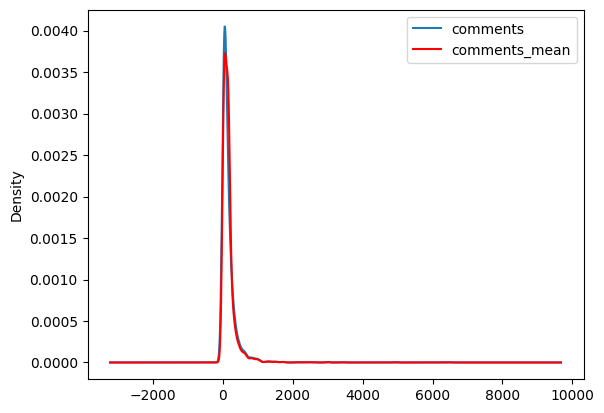

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['comments'].plot(kind='kde', ax=ax)
df.comments_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<h4>Advantages And Disadvantages of Mean/Median Imputation</h4>

i. Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

ii. Disadvantages
1. Change or Distortion in the original variance
Impacts Correlation

<h4>2.**Capture NaN values and create new feature**</h4>

It has the assumption that the data are not missing completely at random(NMCAR)


In [ ]:
df['comments_NAN']=np.where(df['comments'].isnull(),1,0)
df['all_speakers_NAN']=np.where(df['all_speakers'].isnull(),1,0)
df['occupations_NAN']=np.where(df['occupations'].isnull(),1,0)
df['about_speakers_NAN']=np.where(df['about_speakers'].isnull(),1,0)

In [ ]:
df[['comments','comments_mean','comments_NAN']].head()

,comments,comments_mean,comments_NAN
0,272.0,272.0,0
1,628.0,628.0,0
2,124.0,124.0,0
3,219.0,219.0,0
4,4931.0,4931.0,0


In [ ]:
df[['all_speakers','all_speakers_NAN','occupations','occupations_NAN','about_speakers','about_speakers_NAN']].head()

,all_speakers,all_speakers_NAN,occupations,occupations_NAN,about_speakers,about_speakers_NAN
0,{0: 'Al Gore'},0,{0: ['climate advocate']},0,{0: 'Nobel Laureate Al Gore focused the world’...,0
1,{0: 'Hans Rosling'},0,{0: ['global health expert; data visionary']},0,"{0: 'In Hans Rosling’s hands, data sings. Glob...",0
2,{0: 'David Pogue'},0,{0: ['technology columnist']},0,{0: 'David Pogue is the personal technology co...,0
3,{0: 'Majora Carter'},0,{0: ['activist for environmental justice']},0,{0: 'Majora Carter redefined the field of envi...,0
4,{0: 'Sir Ken Robinson'},0,"{0: ['author', 'educator']}",0,"{0: ""Creativity expert Sir Ken Robinson challe...",0


<h5> 0 for when values in variables are null and 1 when values in variables are not null </h5>

i. Advantages
1. Easy to implement(Robust to outliers)
2. Captures the importance of missing values i.e. let se if we replace our missing value with mean/most freq then with this additional NaN feature where value will be null it will be 1 so this shows the importance of null in data and helps model to learn more easily

ii. Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

#### 3.End of distribution imputataion for Comment feature.

<Axes: >

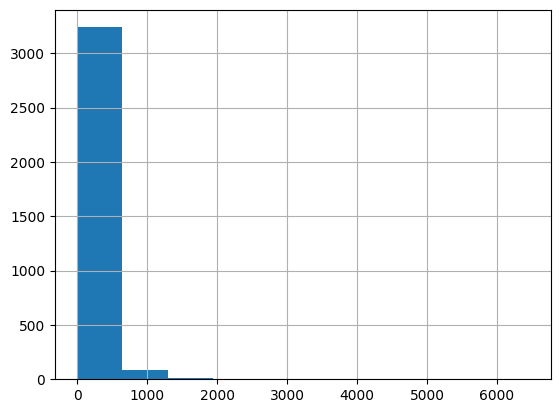

In [ ]:
df['comments'].hist()

In [ ]:
df['comments'].nlargest()

94      6449.0
4       4931.0
617     3424.0
1735    3006.0
197     2984.0
Name: comments, dtype: float64

In [ ]:
print('Mean for Comments:                                ',df.comments.mean())
print('End of distribution for Comments with 3rd std dev:',df.comments.mean()+3*df.comments.std())
extreme=df.comments.mean()+3*df.comments.std()

Mean for Comments:                                 161.99701492537312
End of distribution for Comments with 3rd std dev: 968.5137814185566


<h5> After 3rd std deviation at the end of distribution value is been taken.</h5>

In [ ]:
def impute_nan(df,variable,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)

In [ ]:
impute_nan(df,'comments',extreme)

In [ ]:
df[['comments','comments_mean','comments_NAN','comments_end_distribution']].head()

,comments,comments_mean,comments_NAN,comments_end_distribution
0,272.0,272.0,0,272.0
1,628.0,628.0,0,628.0
2,124.0,124.0,0,124.0
3,219.0,219.0,0,219.0
4,4931.0,4931.0,0,4931.0


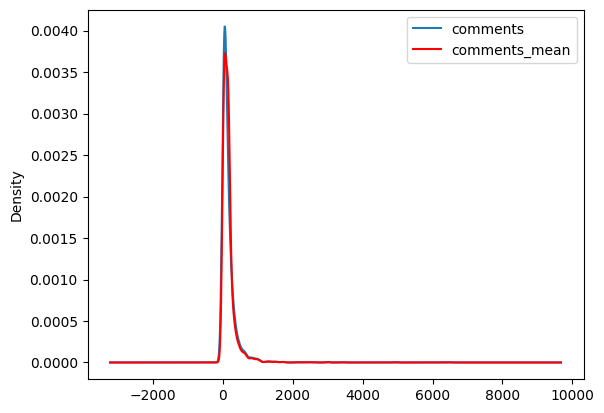

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['comments'].plot(kind='kde', ax=ax)
df.comments_mean.plot(kind='kde', ax=ax, color='red')
#df.comments_end_distribution.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

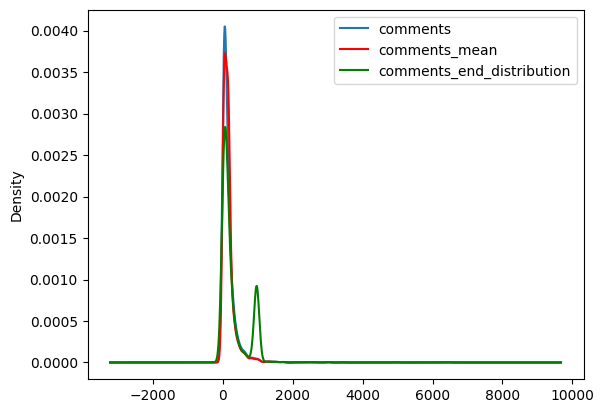

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['comments'].plot(kind='kde', ax=ax)
df.comments_mean.plot(kind='kde', ax=ax, color='red')
df.comments_end_distribution.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Observation: We can see that using end of distribution creates more noise at the end (green) which distorts the graph where most of comments with null are replaced with higher values

<h4>5. Frequent category imputation</h5>
For categorical features only

In [ ]:
df.isna().sum()

talk_id                        0
title                          0
speaker_1                      0
all_speakers                   4
occupations                  522
about_speakers               503
views                          0
recorded_date                  1
published_date                 0
event                          0
native_lang                    0
available_lang                 0
comments                     655
duration                       0
topics                         0
related_talks                  0
url                            0
description                    0
transcript                     0
published_year                 0
published_month                0
published_day                  0
comments_mean                  0
comments_NAN                   0
all_speakers_NAN               0
occupations_NAN                0
about_speakers_NAN             0
comments_end_distribution      0
dtype: int64

In [ ]:
df["all_speakers_most_frequent_category"] = df['all_speakers']
df["occupations_frequent_category"] = df['occupations']
df["about_speakers_most_frequent_category"] = df['about_speakers']

In [ ]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [ ]:
for feature in ['all_speakers_most_frequent_category','occupations_frequent_category','about_speakers_most_frequent_category']:
    impute_nan(df,feature)

In [ ]:
df[['all_speakers','all_speakers_most_frequent_category']].head()

,all_speakers,all_speakers_most_frequent_category
0,{0: 'Al Gore'},{0: 'Al Gore'}
1,{0: 'Hans Rosling'},{0: 'Hans Rosling'}
2,{0: 'David Pogue'},{0: 'David Pogue'}
3,{0: 'Majora Carter'},{0: 'Majora Carter'}
4,{0: 'Sir Ken Robinson'},{0: 'Sir Ken Robinson'}


In [ ]:
df.isnull().mean()

talk_id                                  0.000000
title                                    0.000000
speaker_1                                0.000000
all_speakers                             0.000999
occupations                              0.130337
about_speakers                           0.125593
views                                    0.000000
recorded_date                            0.000250
published_date                           0.000000
event                                    0.000000
native_lang                              0.000000
available_lang                           0.000000
comments                                 0.163546
duration                                 0.000000
topics                                   0.000000
related_talks                            0.000000
url                                      0.000000
description                              0.000000
transcript                               0.000000
published_year                           0.000000


So there are 2 ways to handle missing categorical values 1: Create NaN with new category and 2 to replace with most frequent category

In [ ]:
print("Total datapoints in data:",df.shape)
df.head(2)

Total datapoints in data: (4005, 31)


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,published_day,comments_mean,comments_NAN,all_speakers_NAN,occupations_NAN,about_speakers_NAN,comments_end_distribution,all_speakers_most_frequent_category,occupations_frequent_category,about_speakers_most_frequent_category
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,27,272.0,0,0,0,0,272.0,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,27,628.0,0,0,0,0,628.0,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob..."


## 3.2 Handle Categorical Features

In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features

['title',
 'speaker_1',
 'all_speakers',
 'occupations',
 'about_speakers',
 'recorded_date',
 'published_date',
 'event',
 'native_lang',
 'available_lang',
 'topics',
 'related_talks',
 'url',
 'description',
 'transcript',
 'all_speakers_most_frequent_category',
 'occupations_frequent_category',
 'about_speakers_most_frequent_category']

In [ ]:
df[categorical_features].head(3)

,title,speaker_1,all_speakers,occupations,about_speakers,recorded_date,published_date,event,native_lang,available_lang,topics,related_talks,url,description,transcript,all_speakers_most_frequent_category,occupations_frequent_category,about_speakers_most_frequent_category
0,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...","['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...
1,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...","['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob..."
2,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...","['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...


In [ ]:
for feature in categorical_features:
    print('Uniuqe categorical values in each feature are :',feature,'=',len(df[feature].unique()))

Uniuqe categorical values in each feature are : title = 4005
Uniuqe categorical values in each feature are : speaker_1 = 3274
Uniuqe categorical values in each feature are : all_speakers = 3307
Uniuqe categorical values in each feature are : occupations = 2050
Uniuqe categorical values in each feature are : about_speakers = 2978
Uniuqe categorical values in each feature are : recorded_date = 1335
Uniuqe categorical values in each feature are : published_date = 2962
Uniuqe categorical values in each feature are : event = 459
Uniuqe categorical values in each feature are : native_lang = 12
Uniuqe categorical values in each feature are : available_lang = 3902
Uniuqe categorical values in each feature are : topics = 3977
Uniuqe categorical values in each feature are : related_talks = 4005
Uniuqe categorical values in each feature are : url = 4005
Uniuqe categorical values in each feature are : description = 4005
Uniuqe categorical values in each feature are : transcript = 4005
Uniuqe categ

<h3> 3.3 Most frequent & popular event category</h3>

In [ ]:
df['event'].nunique()

459

This is the issue of high cardinality.Because this may led to curse of dimensionality

In [ ]:
df['event'].value_counts().head(10)

TED-Ed            556
TED2018            96
TED2017            96
TED2019            91
TED2014            84
TED2009            81
TED2016            75
TED2013            75
TED2015            75
TEDGlobal 2012     70
Name: event, dtype: int64

TED-Ed is the only event which is repeated most number of time as compared to other events

#### 1. Count_frequency_encoding is one of the technique which help to reduce the cardinality issue where we can choose a threshold.

In [ ]:
df_frequency_map = df.event.value_counts().to_dict()

In [ ]:
df['event_counts'] = df.event
df.event_counts = df.event_counts.map(df_frequency_map)

df.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,comments_mean,comments_NAN,all_speakers_NAN,occupations_NAN,about_speakers_NAN,comments_end_distribution,all_speakers_most_frequent_category,occupations_frequent_category,about_speakers_most_frequent_category,event_counts
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,272.0,0,0,0,0,272.0,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,42


In [ ]:
df[['event','event_counts']].tail()

,event,event_counts
4000,TED2020: The Prequel,4
4001,TED-Ed,556
4002,TEDxMileHigh,21
4003,TED-Ed,556
4004,TED-Ed,556


In [ ]:
event_filtered=df.loc[df.event_counts >65]

print(event_filtered['event'].value_counts())

TED-Ed            556
TED2017            96
TED2018            96
TED2019            91
TED2014            84
TED2009            81
TED2013            75
TED2015            75
TED2016            75
TED2011            70
TEDGlobal 2012     70
TED2007            68
TED2010            68
TEDGlobal 2011     68
TEDGlobal 2013     67
Name: event, dtype: int64


We can take any threshold of our choice, here i have taken 65 as threshold.

In [ ]:
#event_filtered.groupby('event').agg({'views':'sum'}).rename('Total_views').reset_index()

event_filtered.groupby('event').agg(Total_views=('views', np.sum),Max_views=('views', np.max),Mean_views=('views', np.mean)).reset_index()

,event,Total_views,Max_views,Mean_views
0,TED-Ed,1145357780,18569680,2.059996e+06
1,TED2007,126494272,15890639,1.860210e+06
2,TED2009,191190144,30977634,2.360372e+06
3,TED2010,156244896,9527997,2.297719e+06
4,TED2011,173624464,14608373,2.480349e+06
5,TED2013,225967516,15339953,3.012900e+06
6,TED2014,240295871,13515693,2.860665e+06
7,TED2015,247702961,33521780,3.302706e+06
8,TED2016,227358612,37976820,3.031448e+06
9,TED2017,227847725,16650639,2.373414e+06


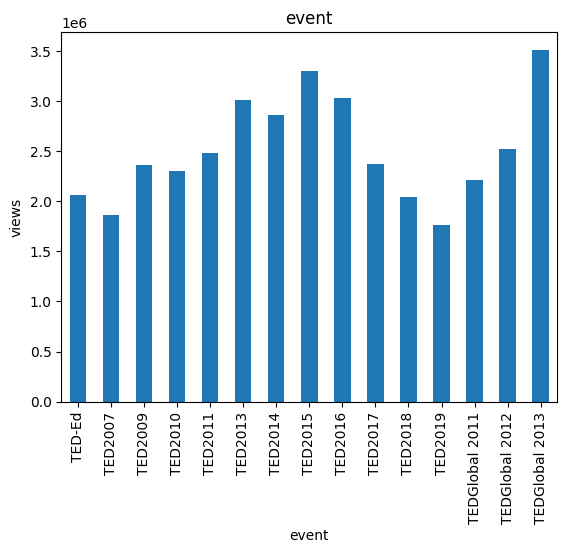

In [ ]:
event_filtered.groupby('event')['views'].mean().plot.bar()
plt.xlabel('event')
plt.ylabel('views')
plt.title('event')
plt.show()

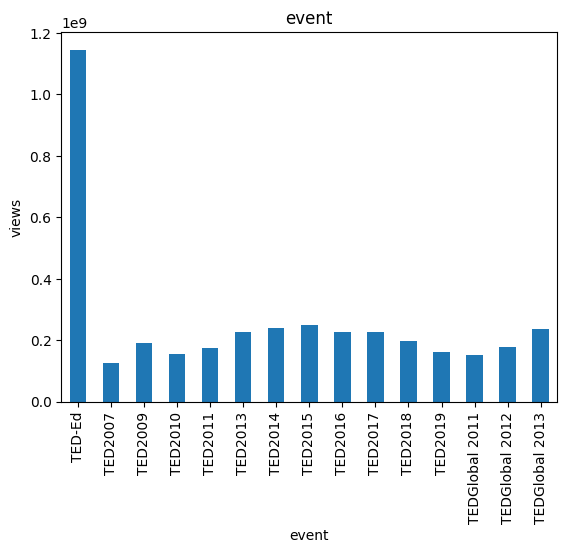

In [ ]:
event_filtered.groupby('event')['views'].sum().plot.bar()
plt.xlabel('event')
plt.ylabel('views')
plt.title('event')
plt.show()


**Observation**: TED-Ed is most repeated category in event feature as compared to others so it has most views but average of TED-Ed is even lesser than most of the events given here.

i. Analysis w.r.to most repeated category TED-Ed
1. Total_views = 1,145,357,780
2. Mean =  2,059,996

ii. Category with highest mean views V/S TED-Ed mean views
1. TEDGlobal 2013 mean = 3,513,586
2. TED-ED mean = 2,059,996

<h3> 3.4 Explore occupation column & find the 5 most popular occupations amongst the speakers.</h3>

 - Create a list of all the unique occupations across the entire occupations columns e.g. 100
 - Pick one occup at a time & check its freq
- writer -
- author -
- educator etc etc

In [ ]:
df['occupations'][1]

"{0: ['global health expert; data visionary']}"

In [ ]:
import ast
# This code will handle NaN values as well.
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return x  # Return original value if conversion fails

# Apply the function to the column
df['occupations'] = df['occupations'].apply(safe_literal_eval)

In [ ]:
d = df['occupations']

d = d.dropna()

In [ ]:
list1 = []
for element in d:
    for key, value in element.items():
      list1.append(value)


In [ ]:
d1 = pd.DataFrame(list1, columns=['occ1','occ2','occ3','occ4','occ5'])

In [ ]:
d1_unique = d1.occ1.unique()
d2_unique = d1.occ2.unique()
d3_unique = d1.occ3.unique()
d4_unique = d1.occ4.unique()
d5_unique = d1.occ5.unique()

In [ ]:
d4_unique=pd.Series(d4_unique)
d3_unique = pd.Series(d3_unique)
d1_unique = pd.Series(d1_unique)
d2_unique = pd.Series(d2_unique)
d5_unique = pd.Series(d5_unique)

In [ ]:
result = pd.concat([d1_unique,d2_unique,d3_unique, d4_unique,d5_unique], ignore_index=True, sort=False)

In [ ]:
d1=result.dropna()
#1987

In [ ]:
type(d1)
d1 = pd.DataFrame(d1, columns=['Unique_Occupations'])

In [ ]:
d1.nunique()

Unique_Occupations    1796
dtype: int64

In [ ]:
# d1 = d1.values.tolist()
d1 = d1.stack().tolist()

In [ ]:
print(d1)

['climate advocate', 'global health expert; data visionary', 'technology columnist', 'activist for environmental justice', 'author', 'architect', 'actor', 'philosopher', 'pastor', 'filmmaker', 'epidemiologist', 'co-founder', 'tech visionary', 'human-computer interface designer', 'pianist', 'violinist', 'inventor', 'industrial designer', 'founder of wikipedia', 'education visionary', 'web humorist', 'blogger; cofounder', 'anthropologist', 'playwright', 'evolutionary biologist', 'physicist', 'writer', 'economist', 'psychologist; happiness expert', 'psychologist', 'neuroscience and cancer researcher', 'crusader against aging', 'investor and advocate for moral leadership', 'founder', 'president-elect of afghanistan', 'nonprofit venture capitalist', 'aircraft engineer', 'polar explorer', 'photographer', 'biomedical inventor', 'musician', 'skeptic', 'mathematician; statistician', 'digital visionary', 'performance poet', 'physician', 'marketer', 'global prioritizer', 'astrophysicist', 'journa

<h3>3.4 Temporial Data Analysis</h3>

Get the release day. e.g. Monday,.....
- Release day is impacting the views or not ?

In [ ]:
df['published_date'] = pd.to_datetime(df['published_date'])
df['published_day'] = df['published_date'].dt.day_name()

In [ ]:
df[['published_date','published_day','published_month','published_year']].tail(5)

,published_date,published_day,published_month,published_year
4000,2020-04-27,Monday,4,2020
4001,2020-04-27,Monday,4,2020
4002,2020-04-28,Tuesday,4,2020
4003,2020-04-30,Thursday,4,2020
4004,2020-04-30,Thursday,4,2020


In [ ]:
df['published_day'].value_counts(sort=True)

Tuesday      857
Thursday     832
Friday       789
Monday       727
Wednesday    703
Sunday        55
Saturday      42
Name: published_day, dtype: int64

<h5>From the given data it seems to be that TED talk are mostly not published on Saturday & Sunday rather than publishing it in Weekdays i.e Tuesday,Monday,Thursday</h5>

In [ ]:
df.groupby('published_day').agg(Total_views=('views', np.sum),Mean_views=('views', np.mean)).reset_index()

,published_day,Total_views,Mean_views
0,Friday,2125417422,2.693812e+06
1,Monday,1420460738,1.953866e+06
2,Saturday,41251046,9.821678e+05
3,Sunday,80193747,1.458068e+06
4,Thursday,1587451192,1.907994e+06
5,Tuesday,1735726562,2.025352e+06
6,Wednesday,1612261616,2.293402e+06


Text(0, 0.5, 'Total_Views')

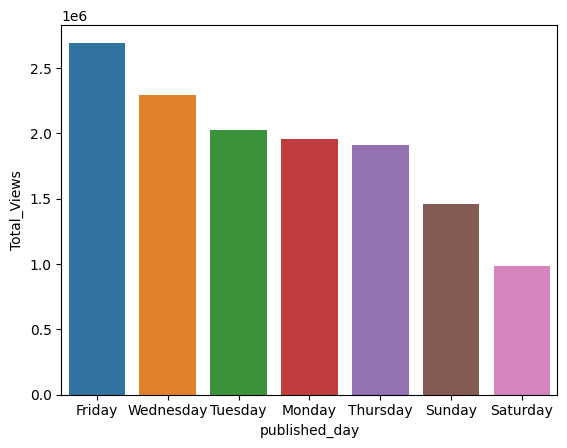

In [ ]:
result = df.groupby('published_day')['views'].mean()
import seaborn as sns
sns.barplot(x=result.index, y=result, order=result.sort_values(ascending = False).index)
plt.xlabel('published_day')
plt.ylabel('Total_Views')

Text(0, 0.5, 'Total_Views')

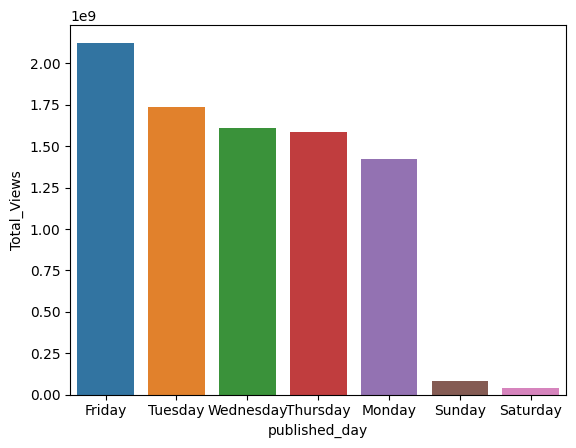

In [ ]:
result = df.groupby('published_day')['views'].sum()
sns.barplot(x=result.index, y=result, order=result.sort_values(ascending = False).index)
plt.xlabel('published_day')
plt.ylabel('Total_Views')

Observation: Even though there are enough amounts of TED Talks been released on Friday so we have max amount of views for Friday

<h4>Get the Published Month</h4>

Is Published Month impacting the views or not ?

In [ ]:
df[['published_date','published_day','published_month','published_year']].tail(2)

,published_date,published_day,published_month,published_year
4003,2020-04-30,Thursday,4,2020
4004,2020-04-30,Thursday,4,2020


In [ ]:
df['published_month'].value_counts(sort=True)

4     423
3     419
2     412
10    350
1     348
9     347
5     312
6     310
11    305
7     278
12    265
8     236
Name: published_month, dtype: int64

In [ ]:
df.groupby('published_month').agg(Total_views=('views', np.sum),Mean_views=('views', np.mean)).reset_index()

,published_month,Total_views,Mean_views
0,1,700983110,2.014319e+06
1,2,880010961,2.135949e+06
2,3,1107919668,2.644200e+06
3,4,922484942,2.180815e+06
4,5,764392825,2.449977e+06
5,6,658906510,2.125505e+06
6,7,591555821,2.127899e+06
7,8,444666494,1.884180e+06
8,9,772027122,2.224862e+06
9,10,668248714,1.909282e+06


Text(0, 0.5, 'Total_Views')

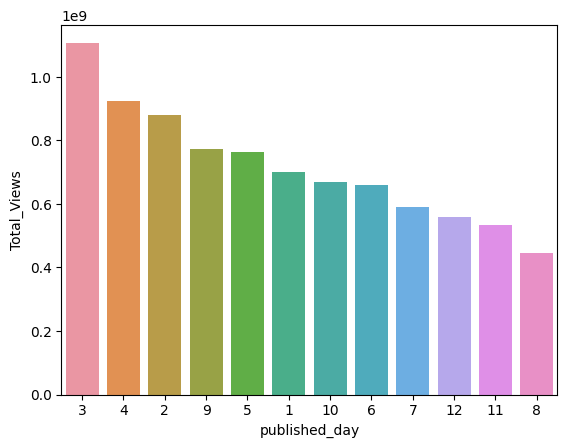

In [ ]:
result = df.groupby('published_month')['views'].sum()
sns.barplot(x=result.index, y=result, order=result.sort_values(ascending = False).index)
plt.xlabel('published_day')
plt.ylabel('Total_Views')

Text(0, 0.5, 'Total_Views')

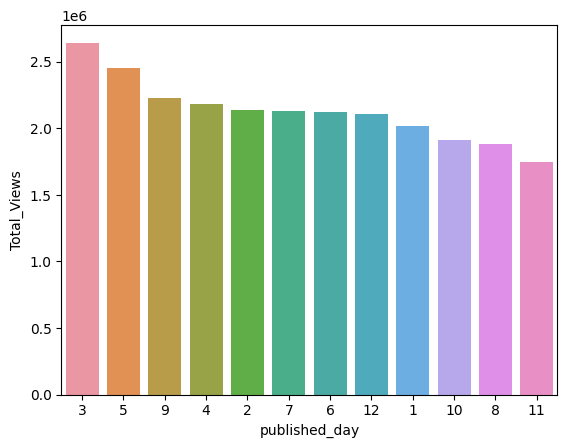

In [ ]:
result = df.groupby('published_month')['views'].mean()
sns.barplot(x=result.index, y=result, order=result.sort_values(ascending = False).index)
plt.xlabel('published_day')
plt.ylabel('Total_Views')

Observation: If we look at average views w.r.to Months then all the months except Oct, Nov & Aug performs better and if we look at Total Views w.r.to Months then Quarter 1 performs better than other Quarters

In [ ]:
# df.to_csv('df.csv',index = 'False')